# Long Short Term Memory (LSTM)

In [7]:
# Import libraries to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math, time, csv
from collections import defaultdict
from math import sqrt

In [8]:
# Load datasets & Analysis
csv_file = './data/TM.csv'
dfTM = pd.read_csv(csv_file, index_col='Date',parse_dates=True)    # Toyota Motor
# dfAP = pd.read_csv('./data/AAPL.csv', index_col='Date',parse_dates=True)  # Apple
# dfGE = pd.read_csv('./data/GE.csv', index_col='Date',parse_dates=True)    # General Electric
# dfMS = pd.read_csv('./data/MSFT.csv', index_col='Date',parse_dates=True)  # Microsoft
# dfSP = pd.read_csv('./data/^GSPC.csv', index_col='Date',parse_dates=True) # S&P 500
dfTM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-07-24,123.779999,123.779999,122.309998,122.489998,98.390572,418000
2007-07-25,123.389999,123.410004,121.500000,122.290001,98.229897,557900
2007-07-26,122.320000,122.349998,117.050003,119.199997,95.747864,1258500
2007-07-27,121.739998,121.739998,119.040001,120.480003,96.776016,679900
2007-07-30,122.120003,122.599998,121.000000,121.790001,97.828300,639300


## Load libraries for LSTM model

In [9]:
# Load libraries
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

### Helper functions

In [10]:
# Load only 'Adj Close' column from CSV
def load_adj_close(filePath):
    columns = defaultdict(list) # each value in each column is appended to a list

    with open(filePath) as f:
        reader = csv.DictReader(f)    # read rows into a dictionary format
        for row in reader:            # read a row as {column1: value1, column2: value2,...}
            for (k,v) in row.items(): # go over each column name and value 
                columns[k].append(v)  # append the value into the appropriate list based on column name k

    return columns['Adj Close']

# Loading datasets and turn them into training and testing sets
def load_data_split_train_test(data, seq_len, normalise_window):
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

# Normalize function
def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

### Toyota

/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, return_sequences=True, input_shape=(None, 1))`
/Users/yuichihagio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


compilation time :  0.154773950577
Train on 2147 samples, validate on 114 samples
Epoch 1/1
2147/2147 [==============================] - 119s - loss: 5.5171e-04 - val_loss: 6.5409e-04
Mean squared error (MSE) 0.000123376674679
Root Mean squared error (RMSE) 0.011107505331


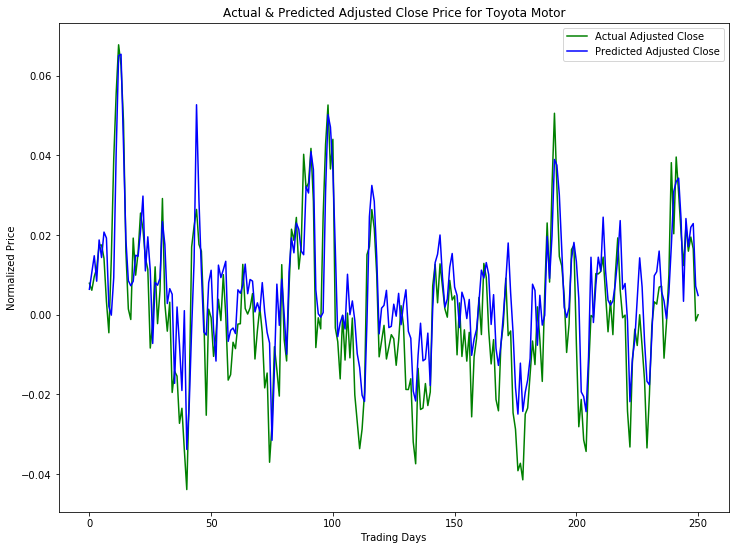

In [13]:
# Change params and variables

batch_size = 1
nb_epoch = 1
seq_len = 5
loss='mean_squared_error'
optimizer = 'rmsprop'

# Get Adjusted Close price and split the data
adj_closes = load_adj_close(csv_file)
X_train_, y_train_, X_test_, y_test_ = load_data_split_train_test(adj_closes, seq_len, True)

# Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss=loss, optimizer=optimizer)
print 'compilation time : ', time.time() - start

#Train the model
model.fit(
    X_train_,
    y_train_,
    batch_size=batch_size,
    nb_epoch=nb_epoch,
    validation_split=0.05)


testPredict = model.predict(X_test_, batch_size=batch_size)
score = model.evaluate(X_test_, y_test_, batch_size=batch_size, verbose=0)

print 'Mean squared error (MSE)', score
print 'Root Mean squared error (RMSE)', math.sqrt(score)

# Set up plot
plt.rcParams['figure.figsize'] = (12, 9)

fig = plt.figure()
ax = fig.add_subplot(111)

# Add labels
plt.ylabel('Normalized Price')
plt.xlabel('Trading Days')

# Plot actual and predicted close values
plt.plot(y_test_,'g', label='Actual Adjusted Close')
plt.plot(testPredict, 'b', label='Predicted Adjusted Close')

# Set title
ax.set_title('Actual & Predicted Adjusted Close Price for Toyota Motor')
ax.legend(loc='upper right')

plt.show()

### Apple

In [ ]:
# Load datasets
csv_file = './data/AAPL.csv'
dfTM = pd.read_csv(csv_file, index_col='Date',parse_dates=True)

# Change params and variables
batch_size = 1
nb_epoch = 1
seq_len = 5
loss='mean_squared_error'
optimizer = 'rmsprop'

# Get Adjusted Close price and split the data
adj_closes = load_adj_close(csv_file)
X_train_, y_train_, X_test_, y_test_ = load_data_split_train_test(adj_closes, seq_len, True)

# Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss=loss, optimizer=optimizer)
print 'compilation time : ', time.time() - start

#Train the model
model.fit(
    X_train_,
    y_train_,
    batch_size=batch_size,
    nb_epoch=nb_epoch,
    validation_split=0.05)


testPredict = model.predict(X_test_, batch_size=batch_size)
score = model.evaluate(X_test_, y_test_, batch_size=batch_size, verbose=0)

print 'Mean squared error (MSE)', score
print 'Root Mean squared error (RMSE)', math.sqrt(score)

# Set up plot
plt.rcParams['figure.figsize'] = (12, 9)

fig = plt.figure()
ax = fig.add_subplot(111)

# Add labels
plt.ylabel('Normalized Price')
plt.xlabel('Trading Days')

# Plot actual and predicted close values
plt.plot(y_test_,'g', label='Actual Adjusted Close')
plt.plot(testPredict, 'b', label='Predicted Adjusted Close')

# Set title
ax.set_title('Actual & Predicted Adjusted Close Price for Apple')
ax.legend(loc='upper right')

plt.show()

### GE

### Microsoft

### S&P 500